In [ ]:
import numpy as np
import pandas as pd


In [ ]:
data = pd.read_csv("Iris.csv")

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
iris_df = data.iloc[:,1:5]
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_df.shape

(150, 4)

In [ ]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


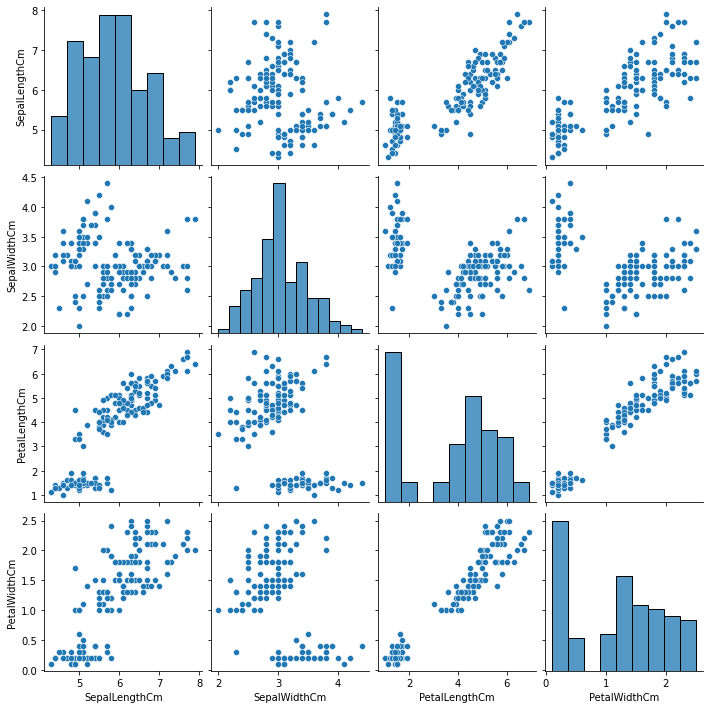

In [ ]:
import seaborn as sns
sns.pairplot(iris_df)

Kmeans


In [ ]:
from sklearn.cluster import KMeans 
model_kmeans = KMeans(n_clusters=3)
model_kmeans.fit(iris_df)
labels = model_kmeans.predict(iris_df)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


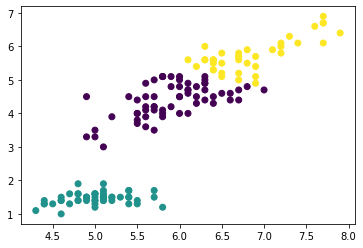

In [ ]:
import matplotlib.pyplot as plt
sl = iris_df['SepalLengthCm']
pl = iris_df['PetalLengthCm']
plt.scatter(sl,pl,c=labels)

In [ ]:
sample = [[5.7,4.2,1.2,0.4]]
newlabel = model_kmeans.predict(sample)
print(newlabel)

[1]


In [ ]:
model_kmeans.inertia_

78.94084142614602

In [ ]:
ks = range(1,6)
inertia = []
for k in ks:
  model = KMeans(n_clusters=k)
  model.fit(iris_df)
  inertia.append(model.inertia_)
print(inertia)

[680.8244, 152.36870647733906, 78.94084142614602, 57.31787321428571, 46.55405384615385]


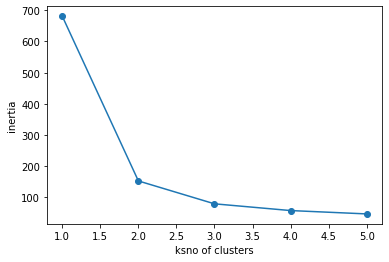

In [ ]:
plt.plot(ks,inertia, '-o')
plt.xlabel("ksno of clusters")
plt.ylabel("inertia")
plt.show()

## evaluate the model

In [ ]:
data["Species"]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [ ]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
species = data['Species']
df = pd.DataFrame({"label":labels, "Species":species})

In [ ]:
df.head()

,label,Species
0,1,Iris-setosa
1,1,Iris-setosa
2,1,Iris-setosa
3,1,Iris-setosa
4,1,Iris-setosa


In [ ]:
 pd.crosstab(df["label"],df["Species"])

Species,Iris-setosa,Iris-versicolor,Iris-virginica
label,,,
0,0,48,14
1,50,0,0
2,0,2,36


## standard scalar

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
pipe = make_pipeline(scaler,model_kmeans)
pipe.fit(iris_df)
labels_sc = pipe.predict(iris_df)
print(labels_sc)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]


In [ ]:
species = data['Species']
df = pd.DataFrame({"label":labels_sc, "Species":species})
df

,label,Species
0,2,Iris-setosa
1,2,Iris-setosa
2,2,Iris-setosa
3,2,Iris-setosa
4,2,Iris-setosa
...,...,...
145,1,Iris-virginica
146,0,Iris-virginica
147,1,Iris-virginica
148,1,Iris-virginica


In [ ]:
 pd.crosstab(df["label"],df["Species"])

Species,Iris-setosa,Iris-versicolor,Iris-virginica
label,,,
0,50,0,0
1,0,39,14
2,0,11,36


# Normalization

In [ ]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
pipe1 = make_pipeline(norm,model_kmeans)
pipe1.fit(iris_df)
labels_no = pipe1.predict(iris_df)
print(labels_no)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 0 2
 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [ ]:
species = data['Species']
df = pd.DataFrame({"label":labels_no, "Species":species})
df

,label,Species
0,1,Iris-setosa
1,1,Iris-setosa
2,1,Iris-setosa
3,1,Iris-setosa
4,1,Iris-setosa
...,...,...
145,0,Iris-virginica
146,0,Iris-virginica
147,0,Iris-virginica
148,0,Iris-virginica


In [ ]:
pd.crosstab(df['label'],df['Species'])

Species,Iris-setosa,Iris-versicolor,Iris-virginica
label,,,
0,0,5,50
1,50,0,0
2,0,45,0


## Heirarchial cluster

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_df = data.iloc[:,1:5]
iris_df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [ ]:
iris_df.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Normalization

In [ ]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
iris_df = norm.fit_transform(iris_df)

In [ ]:
iris_df

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

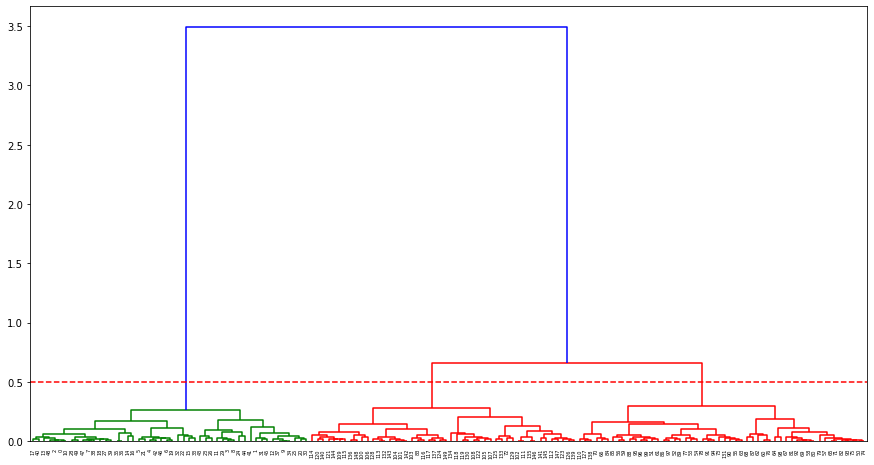

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(iris_df, method="ward")
plt.figure(figsize=(15,8))
dendrogram(linked, orientation='top', distance_sort='ascending',show_leaf_counts= 'True')
plt.hlines(0.5,0,5000,colors = 'r', linestyles='dashed')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 3, affinity="euclidean",linkage='ward')
labels = cluster.fit_predict(iris_df)
labels 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
df = pd.DataFrame({"Labels":labels,"Species":data["Species"]})
df

,Labels,Species
0,1,Iris-setosa
1,1,Iris-setosa
2,1,Iris-setosa
3,1,Iris-setosa
4,1,Iris-setosa
...,...,...
145,2,Iris-virginica
146,2,Iris-virginica
147,2,Iris-virginica
148,2,Iris-virginica


In [ ]:
pd.crosstab(df["Labels"], df["Species"])

Species,Iris-setosa,Iris-versicolor,Iris-virginica
Labels,,,
0,0,48,4
1,50,0,0
2,0,2,46
